# Example case of fitting a spherical cluster. #

This thread shows how to use _M2_ProposalTools_ to fit a spherical cluster model to an input fits file.

In [1]:
### Useful libraries
import numpy as np
import astropy.units as u
from astropy.io import fits 
#### Modules within our library
import M2_ProposalTools.WorkHorse as WH
import M2_ProposalTools.MakeRMSmap as MRM
import M2_ProposalTools.ModelFitting as MF

In [4]:
outdir   = "/home/data/MUSTANG2/SimulatedObservations/QuickAndDirty/"

M5_14    = 6.0
M500     = M5_14*1e14*u.M_sun
z        = 0.5
pixsize  = 4.0

times    = [10,10]
ptgs     = [[180,45.0],[180,45.0]]
sizes    = [3.5,3.5]
offsets  = [1.5,0]

pixstr   = "{:.1f}".format(pixsize).replace(".","p")
zstr     = "{:.1f}".format(z).replace(".","z")
Mstr     = "{:.1f}".format(M5_14).replace(".","m")
sss      = ["{:.1f}".format(mysz).replace(".","s") for mysz in sizes]
sts      = ["{:.1f}".format(mytime).replace(".","h") for mytime in times]
ssstr    = "_".join(sss)
ststr    = "_".join(sts)
InputStr = "_".join([zstr,Mstr,ssstr,ststr,pixstr])

filename = "SimulatedObs_Unsmoothed_"+InputStr+".fits"

/home/charles/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[2.42406841e-05 4.93877836e-05 1.00622291e-04 2.05007084e-04
 4.17679859e-04 8.50977740e-04]
Bins start with:  [  5.          10.18696162  20.75483742  42.28574646  86.15265527
 175.52675858]
Bins are now:  [  5.          10.18696162  20.75483742  42.28574646  86.15265527
 175.52675858]


  0%|          | 9/5000 [00:07<1:04:33,  1.29it/s]/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/analytic_integrations.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  yint = 1.0 - (rin/rout)**(2-alpha)  # I could leave out the second term...
100%|██████████| 5000/5000 [54:02<00:00,  1.54it/s] 


###########################################################################
R500 found to be:  0.0009067991729115111  radians
M500 found to be:  7.259889279015373  \pm  1.4927311627951312  1e14 M_sun
P500 found to be:  0.006717380296763477 keV / cm3
Systematic error on M500:  0.050413043375434057  1e14 M_sun
###########################################################################
[[ 3.93260929e-06  8.41248074e-07  8.02942343e-07]
 [ 3.32364681e-01  2.29394795e-01  1.86833939e-01]
 [ 4.61086262e-01  1.59650640e-01  1.47018968e-01]
 [ 1.49159611e-01  3.79647582e-02  3.24429723e-02]
 [ 1.22736056e-01  1.62574998e-02  1.58815934e-02]
 [ 4.68052330e-02  8.80548931e-03  8.76094443e-03]
 [ 8.30604893e-03  3.23915238e-03  3.65739409e-03]
 [-3.58213356e+00  2.95951889e+00  2.96862692e+00]
 [ 2.30007445e-02  3.18498149e+00  2.81920448e+00]]


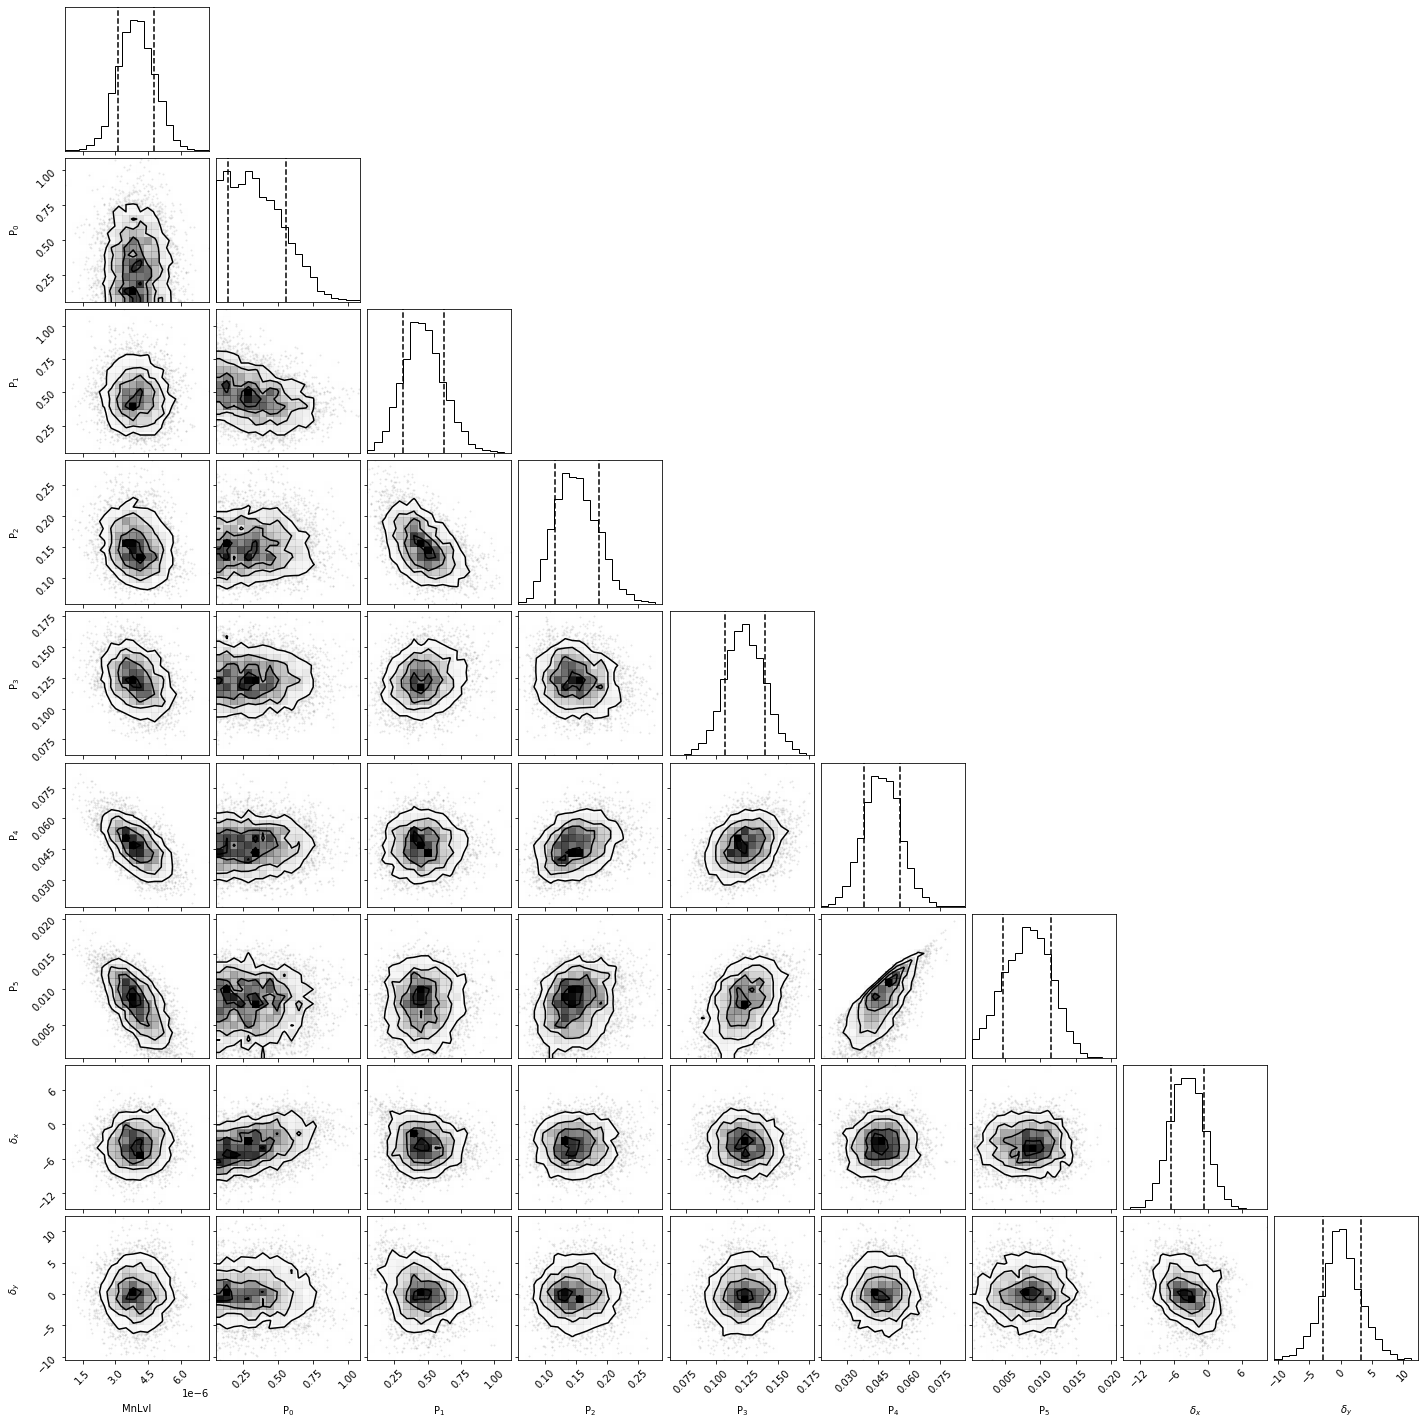

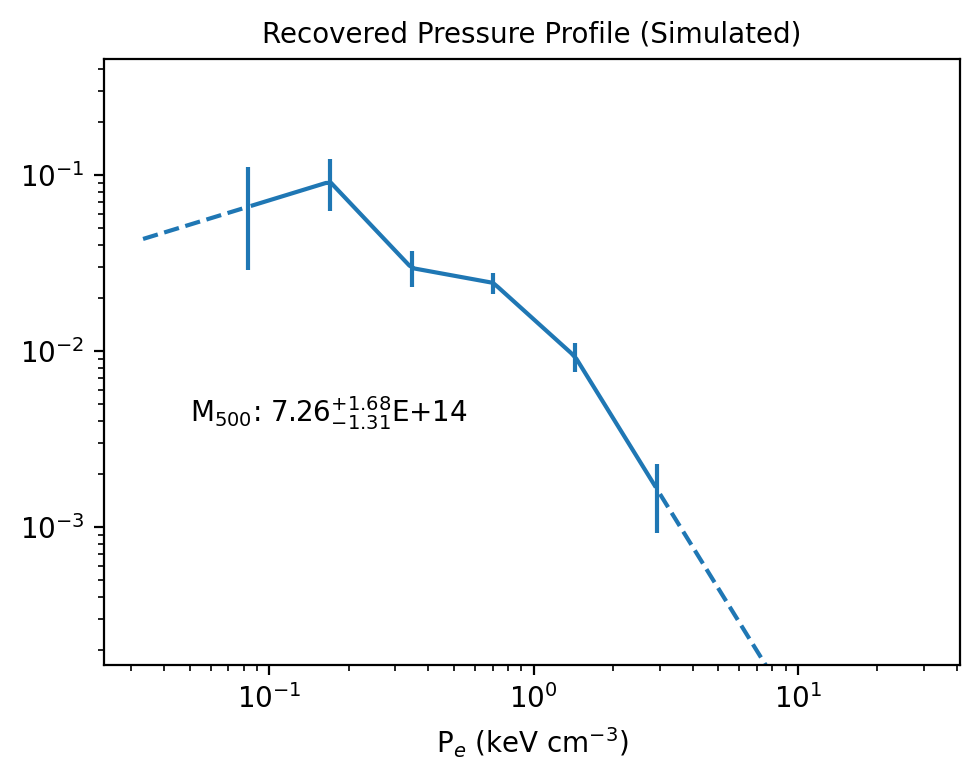

In [5]:
inputHDU = fits.open(outdir+filename)
nsteps   = 5000
nsstr    = "_"+repr(nsteps)+"steps"
outbase = "NP_fit_"+InputStr+nsstr+"_corner.png"
MF.fit_spherical_model(z,M500,inputHDU,outdir=outdir,nsteps=nsteps,outbase=outbase)   # 100 for testing purposes